<div style="display: flex; justify-content: center;">
    <img src="IA/mion.png" style="border-radius: 20px; width: 75%;">
</div>

<small> Imagen creada por IA generativa usando el siguiente pront: 'Dibújame a un robot conduciendo una grua, dibujo simple.  
(luego editada con powerpoint)<small>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import seaborn as sns
from scipy.stats import ttest_ind 
from scipy import stats
from scipy.stats import f_oneway
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

### En este Jupyter Notebook generaré una figura en la que mostraré los diferentes depósitos de vehículos municipales de Madrid sobre una imagen georreferenciada. El tamaño del círculo dependerá del número de vehículos que ingresaron a los mismos desde 2016 hasta 2023.

>El primer paso será cargar el DataFrame que contiene todas las entradas de los años combinados. Esto lo realicé en el Jupyter notebook 'preparacion_datos_entrada.ipynb'.

In [2]:
df_depo_completo= pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\Dataset\entradas_validas\df_entradas_util.parquet')

In [3]:
df_depo= pd.read_parquet(r'C:\Users\pepea\Desktop\the_drige\EDA\Dataset\entradas_validas\df_entradas_util.parquet')
df_depo.drop(["tipoVehiculo","grua","motivo","turno","Fecha_e","Festivo","Hora_e", "tipoVia","via","numero", "cp","FinDeSema"], axis=1, inplace=True)
df_depo.head(3)

,deposito
idVehiculo,
CO20160101002327,Colón
CO20160101012710,Colón
CO20160101031613,Colón


>Solo interesa la columna que contiene los nombres de los depósitos, así que crearé un DataFrame que incluya únicamente esta columna.

### Son varios años de estudios, múltiples depósitos y con toda seguridad los datos no han sido manejados por una única persona. Por lo tanto, verificaré las distintas entradas que tiene la columna con los nombres de los depósitos.

In [4]:
entradas_distintas = df_depo['deposito'].value_counts()
entradas_distintas

deposito
COLON             69417
ESCUADRON         54791
PASEO IMPERIAL    32252
VICALVARO         27951
EL RECUERDO       26585
Colón             22400
Escuadrón         22301
MEDIODIA 3        19671
Paseo Imperial    14169
El Recuerdo       12473
Vicálvaro          6548
Mediodía 3         3941
MEDIODIA 2         2271
Barajas            1944
Mediodía 2           61
COMISARIA             1
Name: count, dtype: int64

>Efectivamente, los depósitos aparecen escritos de forma distinta, con mayúscula, con minúscula, con tilde, sin ella...

In [5]:
df_depo['deposito'] = df_depo['deposito'].replace({
    'Colón': 'COLON',
    'El Recuerdo': 'EL RECUERDO',
    'Paseo imperial': "PASEO IMPERIAL",
    "Vicálvaro" : "VICALVARO",
    "Barajas" : "BARAJAS",
    "MEDIODIA 3": "MEDIODIA II Y III",
    "Mediodía 3": "MEDIODIA II Y III",
    "MEDIODIA 2": "MEDIODIA II Y III",
    "Mediodía 2": "MEDIODIA II Y III",
    "Escuadrón" : "ESCUADRON",
    "Paseo Imperial":  "PASEO IMPERIAL"

})

> ### Con este código, los depósitos tendrán el nombre siguiendo siempre el mismo formato.

>>MEDIODIA II y MEDIODIA III en el archivo CSV '300227-0-grua-depositos.csv' aparecen en la misma línea.  
Este archivo contiene la información con la posición.En el archivo 'Depositos.CSV' aparecen independientemente.  
Buscando en Google Maps, comprobé que ambos están muy cerca, por lo que los consideraré como uno. Además, no recibieron muchos vehículos.

In [6]:
entradas_distintas = df_depo['deposito'].value_counts()
print(entradas_distintas)

deposito
COLON                91817
ESCUADRON            77092
PASEO IMPERIAL       46421
EL RECUERDO          39058
VICALVARO            34499
MEDIODIA II Y III    25944
BARAJAS               1944
COMISARIA                1
Name: count, dtype: int64


>Ahora, con los nombres de los depósitos con el mismo formato, haré un conteo de las veces que aparece cada uno,  
que será el número de vehículos que han recibido a lo largo de los años estudiados.

### Para esta figura es necesario saber cuántos vehículos recibió cada depósito, lo cual ya está hecho, y saber dónde está cada depósito. Para eso, cargaré el CSV con dicha información.

>Solo con las columnas que nos interesan.

In [7]:
df_depo_depo= pd.read_csv(r'C:\Users\pepea\Desktop\the_drige\EDA\Dataset\datos\auxiliares\300227-0-grua-depositos.csv',  encoding='ISO-8859-1', sep=';')
df_depo_depo.drop(["PK",	"DESCRIPCION-ENTIDAD","HORARIO",	"EQUIPAMIENTO",	"TRANSPORTE","DESCRIPCION",	"ACCESIBILIDAD","CONTENT-URL",	"NOMBRE-VIA", "NUM","PLANTA","PUERTA","ESCALERAS",	"ORIENTACION",	"LOCALIDAD","PROVINCIA", "CLASE-VIAL",	"TIPO-NUM",	"CODIGO-POSTAL", "COD-BARRIO", "BARRIO", "COD-DISTRITO","DISTRITO", "TELEFONO",	"FAX","EMAIL","TIPO"], axis=1, inplace=True)
df_depo_depo

,NOMBRE,COORDENADA-X,COORDENADA-Y,LATITUD,LONGITUD
0,Depósito de la Grúa. Base de Colón,441472,4475155,40.424971,-3.689957
1,Depósito de la Grúa. Base de El Escuadrón,437590,4476386,40.435778,-3.735837
2,Depósito de la Grúa. Base de Nuestra Señora de...,442422,4480358,40.471909,-3.679230
3,Depósito de la Grúa. Base de Vicálvaro,450565,4472448,40.401175,-3.582559
4,Depósito de la Grúa. Base del Paseo Imperial,439063,4473067,40.405989,-3.718153
5,Depósito de la Grúa. Bases de Mediodía II y Me...,444929,4468482,40.365093,-3.648629


In [8]:
entradas_distintas_depo = df_depo_depo['NOMBRE'].value_counts()
print(entradas_distintas_depo)

NOMBRE
Depósito de la Grúa. Base de Colón                          1
Depósito de la Grúa. Base de El Escuadrón                   1
Depósito de la Grúa. Base de Nuestra Señora del Recuerdo    1
Depósito de la Grúa. Base de Vicálvaro                      1
Depósito de la Grúa. Base del Paseo Imperial                1
Depósito de la Grúa. Bases de Mediodía II y Mediodía III    1
Name: count, dtype: int64


In [9]:
df_depo_depo['NOMBRE'] = df_depo_depo['NOMBRE'].replace({
    'Depósito de la Grúa. Base de Colón' : 'COLON',
               
'Depósito de la Grúa. Base de El Escuadrón'    : 'ESCUADRON',
'Depósito de la Grúa. Base de Nuestra Señora del Recuerdo'   : 'EL RECUERDO',
'Depósito de la Grúa. Base de Vicálvaro'    : "VICALVARO",                
'Depósito de la Grúa. Base del Paseo Imperial'  : "PASEO IMPERIAL",

'Depósito de la Grúa. Bases de Mediodía II y Mediodía III'    : 'MEDIODIA II Y III'

})

> Con este código pondré los nombres de los depósitos en el mismo formato que el DataFrame con el número de vehículos recibidos.

In [10]:
df_depo_depo

,NOMBRE,COORDENADA-X,COORDENADA-Y,LATITUD,LONGITUD
0,COLON,441472,4475155,40.424971,-3.689957
1,ESCUADRON,437590,4476386,40.435778,-3.735837
2,EL RECUERDO,442422,4480358,40.471909,-3.679230
3,VICALVARO,450565,4472448,40.401175,-3.582559
4,PASEO IMPERIAL,439063,4473067,40.405989,-3.718153
5,MEDIODIA II Y III,444929,4468482,40.365093,-3.648629


>Barajas" no aparece en el DataFrame con la posición de los depósitos. Fue cerrado en 2017. Buscaré las coordenadas en Google y las añadiré.

In [11]:
df_barajas = df_depo_completo.loc[df_depo_completo['deposito'] == 'Barajas']
df_barajas.tail(2)

,deposito,tipoVehiculo,motivo,turno,Fecha_e,FinDeSema,Festivo,Hora_e,grua,tipoVia,via,numero,cp
idVehiculo,,,,,,,,,,,,,
BR20170127221748,Barajas,Coche,13,Tarde,2017-01-27,False,No festivo,22:15:00,S215,CALLE,ARTURO SORIA,0,28033
BR20170131221539,Barajas,Coche,24,Tarde,2017-01-31,False,No festivo,22:14:00,S214,ACCESO,AEROPUERTO T4,0,0


>"Al buscar informacion sobre el deposito de barjas en internet, vi que esté fue cerrado en 2017, y al buscarlo en la tabla, por el final, la ultima entrada fue en enero de 2017"

In [12]:
df_barajas = df_depo_completo.loc[df_depo_completo['deposito'] == 'COMISARIA']
df_barajas

,deposito,tipoVehiculo,motivo,turno,Fecha_e,FinDeSema,Festivo,Hora_e,grua,tipoVia,via,numero,cp
idVehiculo,,,,,,,,,,,,,
CM20190326105700,COMISARIA,Coche,23,Mañana,2019-03-26,False,No festivo,10:52:00,None,PLAZA,ESPAÑA,None,28000


>Al ver los distintos nombres de los depósitos y el conteo de veces que aparecían, el depósito "comisaría" aparece solo una vez. El vehículo fue retirado de la Plaza de España y puesto a disposición judicial. No hay información sobre el depósito "comisaría"; posiblemente se trate de un error al ingresar los datos. Lo lógico será eliminar la línea.

### Ahora sí, crearé un DataFrame con la frecuencia de veces que aparece cada depósito.

In [13]:
df_frecuencias = df_depo.groupby("deposito").size().reset_index(name="frecuencia")
df_frecuencias 

,deposito,frecuencia
0,BARAJAS,1944
1,COLON,91817
2,COMISARIA,1
3,EL RECUERDO,39058
4,ESCUADRON,77092
5,MEDIODIA II Y III,25944
6,PASEO IMPERIAL,46421
7,VICALVARO,34499


In [14]:
#df_frecuencias.drop(df_frecuencias.index[[2]], inplace=True) #lo comento para no seguir borrado 
#df_frecuencias.to_parquet("C:/Users/pepea/Desktop/the_drige/EDA/Dataset/depositos_generados/cuantia_depositos.parquet")

>Usando el índice implícito de la fila "Comisaria", la eliminaré. Además, guardaré la tabla en formato Parquet y comentaré ambas líneas de código para evitar que siga borrando depósitos y guardando la tabla con depósitos borrados cada vez que se ejecute el código.

In [15]:
df_frecuencias

,deposito,frecuencia
0,BARAJAS,1944
1,COLON,91817
2,COMISARIA,1
3,EL RECUERDO,39058
4,ESCUADRON,77092
5,MEDIODIA II Y III,25944
6,PASEO IMPERIAL,46421
7,VICALVARO,34499


>"Comisaria" ya no aparece.

In [16]:
df_depo_depo

,NOMBRE,COORDENADA-X,COORDENADA-Y,LATITUD,LONGITUD
0,COLON,441472,4475155,40.424971,-3.689957
1,ESCUADRON,437590,4476386,40.435778,-3.735837
2,EL RECUERDO,442422,4480358,40.471909,-3.679230
3,VICALVARO,450565,4472448,40.401175,-3.582559
4,PASEO IMPERIAL,439063,4473067,40.405989,-3.718153
5,MEDIODIA II Y III,444929,4468482,40.365093,-3.648629


In [17]:
datos_barajas = {
    "NOMBRE": ["BARAJAS"],
    "COORDENADA-X": ["451208"],
    "COORDENADA-Y": ["4479801"],
    "LATITUD": ["40.46745350305786"],
    "LONGITUD": ["-3.575548192055333"]
}

df_barajas = pd.DataFrame(datos_barajas)
df_barajas

,NOMBRE,COORDENADA-X,COORDENADA-Y,LATITUD,LONGITUD
0,BARAJAS,451208,4479801,40.46745350305786,-3.575548192055333


>Crearé un DataFrame con la información de la posición del depósito de Barajas. Este DataFrame tendrá las mismas columnas que el DataFrame con información sobre depósitos que se ha limpiado en celdas anteriores.

>>La longitud y latitud de este DataFrame las he obtenido de Google Maps. Usando el siguiente  [enlace](https://www.ign.es/web/calculadora-geodesica),he conseguido las coordenadas X e Y gracias a una calcuadora de coordenadas.

### Ahora uniré el DataFrame de Barajas con el DataFrame que contiene la información de la posición de los demás depósitos.

In [18]:
df_con_barajas= pd.concat([df_barajas,df_depo_depo], ignore_index=True)
df_con_barajas

,NOMBRE,COORDENADA-X,COORDENADA-Y,LATITUD,LONGITUD
0,BARAJAS,451208,4479801,40.46745350305786,-3.575548192055333
1,COLON,441472,4475155,40.424971,-3.689957
2,ESCUADRON,437590,4476386,40.435778,-3.735837
3,EL RECUERDO,442422,4480358,40.471909,-3.67923
4,VICALVARO,450565,4472448,40.401175,-3.582559
5,PASEO IMPERIAL,439063,4473067,40.405989,-3.718153
6,MEDIODIA II Y III,444929,4468482,40.365093,-3.648629


### Ordenaré los dos DataFrame (posición y frecuencia) en función al nombre de los depósitos, y renombraré las columnas de la tabla de frecuencias para poder unirlas.

In [19]:
df_frecuencias_ordenado = df_frecuencias.sort_values(by='deposito')
df_con_barajas_ordenado = df_con_barajas.sort_values(by='NOMBRE')

In [20]:
df_frecuencias_ordenado = df_frecuencias_ordenado.rename(columns={'deposito': 'NOMBRE'})
df_frecuencias_ordenado = df_frecuencias_ordenado.rename(columns={'frecuencia': 'VEHÍCULOS'})
df_frecuencias_ordenado.to_parquet("C:/Users/pepea/Desktop/the_drige/EDA/Dataset/depositos_generados/cuantia_depositos_RENOMBRADO.parquet")
df_frecuencias_ordenado

,NOMBRE,VEHÍCULOS
0,BARAJAS,1944
1,COLON,91817
2,COMISARIA,1
3,EL RECUERDO,39058
4,ESCUADRON,77092
5,MEDIODIA II Y III,25944
6,PASEO IMPERIAL,46421
7,VICALVARO,34499


In [21]:
depositos_madrid = pd.merge(df_frecuencias_ordenado, df_con_barajas_ordenado, on='NOMBRE') 
depositos_madrid['COORDENADA-X'] = depositos_madrid['COORDENADA-X'].astype(int) #PARA QUE SE PUEDA GUARDAR EN PARQUET HAY QUE DARLE FORMATO NUMERICO.
depositos_madrid['COORDENADA-Y'] = depositos_madrid['COORDENADA-Y'].astype(int)
depositos_madrid['LATITUD'] = depositos_madrid['LATITUD'].astype(float)
depositos_madrid['LONGITUD'] = depositos_madrid['LONGITUD'].astype(float)
depositos_madrid.to_parquet("C:/Users/pepea/Desktop/the_drige/EDA/Dataset/depositos_generados/depositos_madrid.parquet")

depositos_madrid

,NOMBRE,VEHÍCULOS,COORDENADA-X,COORDENADA-Y,LATITUD,LONGITUD
0,BARAJAS,1944,451208,4479801,40.467454,-3.575548
1,COLON,91817,441472,4475155,40.424971,-3.689957
2,EL RECUERDO,39058,442422,4480358,40.471909,-3.679230
3,ESCUADRON,77092,437590,4476386,40.435778,-3.735837
4,MEDIODIA II Y III,25944,444929,4468482,40.365093,-3.648629
5,PASEO IMPERIAL,46421,439063,4473067,40.405989,-3.718153
6,VICALVARO,34499,450565,4472448,40.401175,-3.582559


In [22]:
"""
coordenadas_google_colon = {
    "NOMBRE": ["BARAJAS", "COLON", "EL RECUERDO", "ESCUADRON", "MEDIODIA II Y III","PASEO IMPERIAL","VICALVARO"],
    "VEHÍCULOS": [1944,91817,39058, 77092,25944,46421,34499],
    "LATITUD": [40.46745350305786,40.42520775145238,40.47241692741055,40.43617739974847,40.368084388547565,40.40545158332348,40.40131007234418],
    "LONGITUD": [-3.575548192055333,-3.6888439039632366,-3.6790184174538623,-3.736054390434338,-3.648954848068716,-3.716697676822534,-3.582461207634098]
}
df_coordenadas_google = pd.DataFrame(coordenadas_google_colon)
#df_coordenadas_google.to_parquet("C:/Users/pepea/Desktop/the_drige/EDA/Dataset/depositos_generados/df_coordenadas_google.parquet")
df_coordenadas_google
"""

'\ncoordenadas_google_colon = {\n    "NOMBRE": ["BARAJAS", "COLON", "EL RECUERDO", "ESCUADRON", "MEDIODIA II Y III","PASEO IMPERIAL","VICALVARO"],\n    "VEHÍCULOS": [1944,91817,39058, 77092,25944,46421,34499],\n    "LATITUD": [40.46745350305786,40.42520775145238,40.47241692741055,40.43617739974847,40.368084388547565,40.40545158332348,40.40131007234418],\n    "LONGITUD": [-3.575548192055333,-3.6888439039632366,-3.6790184174538623,-3.736054390434338,-3.648954848068716,-3.716697676822534,-3.582461207634098]\n}\ndf_coordenadas_google = pd.DataFrame(coordenadas_google_colon)\n#df_coordenadas_google.to_parquet("C:/Users/pepea/Desktop/the_drige/EDA/Dataset/depositos_generados/df_coordenadas_google.parquet")\ndf_coordenadas_google\n'

>Haciendo pruebas para el scatterplot en el que se muestran los distintos depósitos en el mapa, con el tamaño del círculo dependiendo de la cantidad de vehículos recibida,  
al principio no funcionaba bien. Pensé que podría ser debido a los valores de latitud y longitud, por lo que decidí hacer un dataframe manualmente. Al final, vi que era debido  
a que la imagen tenía un sistema diferente de coordenadas.

### Con los datos preparados y las imágenes georreferenciadas en la carpeta correspondiente, podemos hacer la figura.

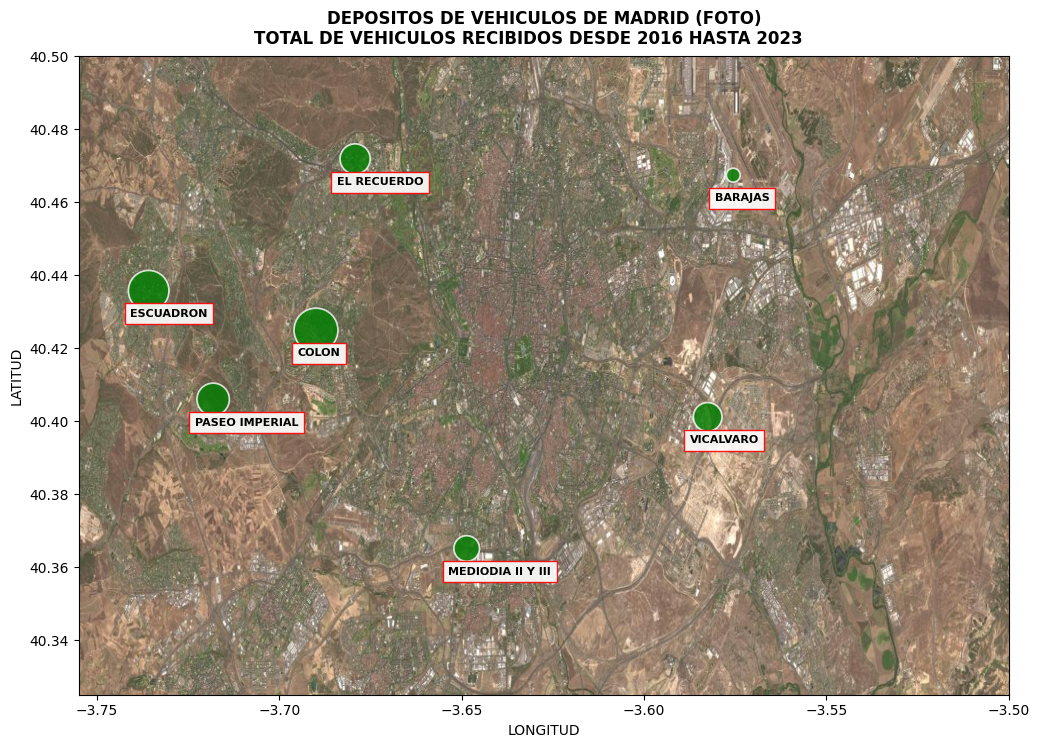

In [23]:

plt.figure(figsize=(12, 12))
img = plt.imread("mapa_georeferenciado/mapa_2024-4-6_164852.jpg")
plt.imshow(img, extent=[-3.755, -3.50, 40.325, 40.5])  
sns.scatterplot(data=depositos_madrid, x='LONGITUD', y='LATITUD', size='VEHÍCULOS',color = "green", sizes=(100, 1000), alpha=0.8, legend=False)
for index, row in depositos_madrid.iterrows():
    offset_x = -0.005  
    offset_y = -0.005  
    plt.annotate(row['NOMBRE'], (row['LONGITUD'] + offset_x, row['LATITUD'] + offset_y), xytext=(0, 0), textcoords='offset points', fontsize=8, va='top', weight='bold', bbox=dict(facecolor='white', alpha=0.9, edgecolor='red'))
plt.xlabel('LONGITUD')
plt.ylabel('LATITUD')
plt.title("DEPOSITOS DE VEHICULOS DE MADRID (FOTO)", fontweight='bold',pad=23.4)
plt.suptitle("TOTAL DE VEHICULOS RECIBIDOS DESDE 2016 HASTA 2023", y=0.7834, fontweight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig(R"C:\Users\pepea\Desktop\the_drige\EDA\imagenes\figura_deposito\foto.png")
plt.show()



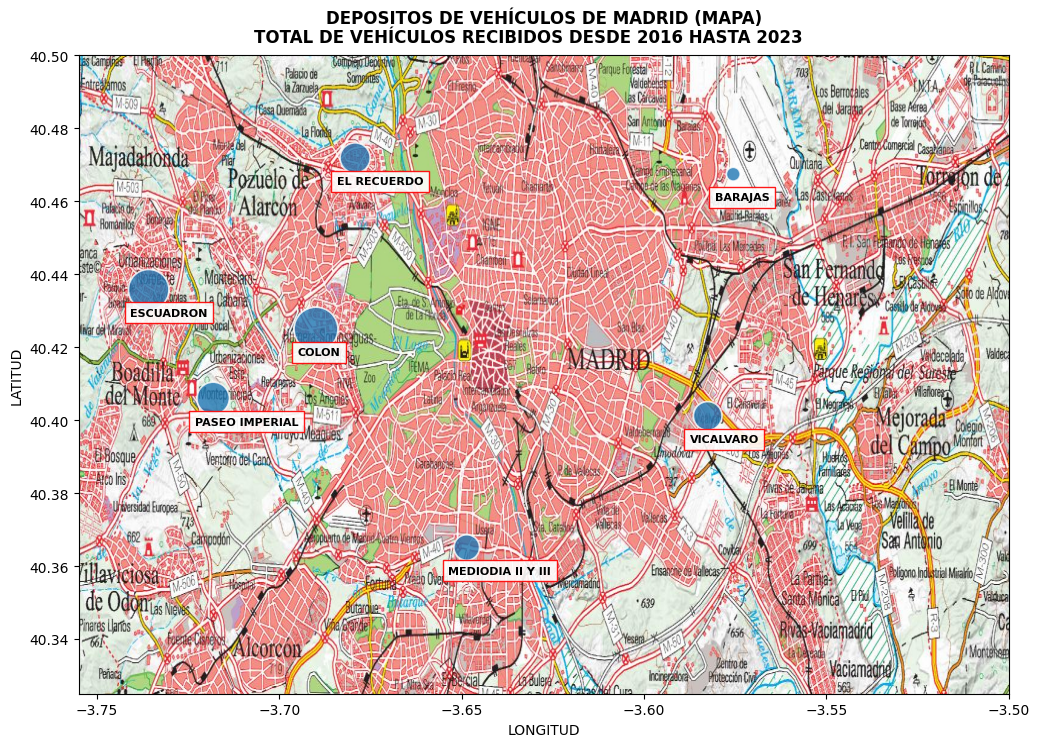

In [26]:

plt.figure(figsize=(12, 12))
img = plt.imread("mapa_georeferenciado/mapa_2024-4-6_164624.jpg")
plt.imshow(img, extent=[-3.755, -3.5, 40.325, 40.5])  
sns.scatterplot(data=depositos_madrid, x='LONGITUD', y='LATITUD', size='VEHÍCULOS', sizes=(100, 1000), alpha=0.8, legend=False)
for index, row in depositos_madrid.iterrows():
    offset_x = -0.005  
    offset_y = -0.005  
    plt.annotate(row['NOMBRE'], (row['LONGITUD'] + offset_x, row['LATITUD'] + offset_y), xytext=(0, 0), textcoords='offset points', fontsize=8, va='top', weight='bold', bbox=dict(facecolor='white', alpha=0.9, edgecolor='red'))
plt.xlabel('LONGITUD')
plt.ylabel('LATITUD')
plt.title("DEPOSITOS DE VEHÍCULOS DE MADRID (MAPA)", fontweight='bold',pad=23)
plt.suptitle("TOTAL DE VEHÍCULOS RECIBIDOS DESDE 2016 HASTA 2023", y=0.7834, fontweight='bold')
plt.gca().set_aspect('equal', adjustable='box')  
plt.savefig(R"C:\Users\pepea\Desktop\the_drige\EDA\imagenes\figura_deposito\mapa.png")
plt.show()

Ambas imágenes georreferenciadas están tomadas de [aquí](https://www.ign.es/iberpix/visor/), usando EPSG 4326, que es el que se utiliza en Google Maps(de donde he tomao las coordenadas).

<img src="./IA/mapadios.jpg" width=600><sub><sup>  

<small>Imagen creada por IA generativa usando el siguiente pront "Dibújame a un robot diciendo adiós con una mano y con la otra leyendo un mapa, dibujo simple."<small>